<a href="https://colab.research.google.com/github/SharooqAtique/deep-learning-and-neural-network-with-keras/blob/main/backpropogation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Backpropagation is the key algorithm used for training neural networks, allowing them to learn from data. It is based on the gradient descent optimization technique and works by iteratively adjusting the weights and biases of the network to minimize the error between the predicted and actual outputs. In this lab, we will create a neural network to implement backpropagation for a XOR problem.**

#Objective

* Train a Neural Network to Solve the XOR Problem
* Implement Backpropagation for Neural Network Training
* Demonstrate the Use of Activation Functions
* Understand the Learning Process Over Multiple Epochs
* Demonstrate Weight and Bias Adjustments via Gradient Descent
* Evaluate the Model's Performance After Training
* Monitor and Analyze the Training Process


#Import Required Libraries

In [4]:
# Importing the required library
import numpy as np
import matplotlib.pyplot as plt

## Initialize Inputs
Define the input and expected output for a XOR gate problem


In [5]:
# Defining inputs and expected output (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 1, 1, 0])  # Expected output for XOR

# Declare the network parameters & the weights

Define the network parameters such as
1. number of input neurons
2. hidden layer neurons
3. output neurons
4. learning rate
5. number of epochs

Also, Declare the weights for the neurons. The initial weights are taken as random numbers which are then optimized by the backpropagation algorithm inside a function parameter `initialize_network_parameters()`


In [6]:
def initialize_network_parameters():
    # Network parameters
    inputSize = 2      # Number of input neurons (x1, x2)
    hiddenSize = 2     # Number of hidden neurons
    outputSize = 1     # Number of output neurons
    lr = 0.1           # Learning rate
    epochs = 180000    # Number of training epochs

    # Initialize weights and biases randomly within the range [-1, 1]
    w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1  # Weights from input to hidden layer
    b1 = np.random.rand(hiddenSize, 1) * 2 - 1          # Bias for hidden layer
    w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1 # Weights from hidden to output layer
    b2 = np.random.rand(outputSize, 1) * 2 - 1          # Bias for output layer

    return w1, b1, w2, b2, lr, epochs


## Training the Neural Network

The neural network works in 5 stages:
1. Forward pass
    * The input **X** is multiplied by the weights **w1** and passed through the first layer, followed by the application of the sigmoid or ReLU activation function. This gives the output for the hidden layer.
    * The output of the hidden layer is then passed through the second set of weights **w2** to compute the final output. Again, a sigmoid activation function is used to generate the final output **a2**.
    
2. Error calculation
    * The error is computed as the difference between the expected output **(d)** and the actual output **(a2)**.
3. Backward pass
    * **Output Layer**: The derivative of the sigmoid activation function is applied to the error, producing the gradient for the output layer **(da2)**. This is used to calculate how much the weights in the output layer need to be adjusted.
    * **Hidden Layer**: The error is then propagated backward to the hidden layer. The gradient at the hidden layer **(da1)** is computed by taking the dot product of the transpose of the weights **(w2.T)** and the gradient from the output layer. The derivative of the activation function (sigmoid or ReLU) is used to adjust this error.
4. Weights and bias updates
    * After computing the **gradients (dz1, dz2)**, the **weights (w1, w2)** and **biases (b1, b2)** are updated using the **learning rate (lr)** and **the gradients**. The updates are done to minimize the error and improve the model’s predictions.
5. Training:
    * This entire process is repeated over many iterations **(epochs)**. During each epoch, the model adjusts its weights and biases to reduce the error. Over time, the network learns to approximate the XOR function.
Forward Pass:



In [7]:
# Get initialized parameters
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


Epoch: 9999, Average error: 0.27666
Epoch: 19999, Average error: 0.26539
Epoch: 29999, Average error: 0.26166
Epoch: 39999, Average error: 0.25969
Epoch: 49999, Average error: 0.25844
Epoch: 59999, Average error: 0.25755
Epoch: 69999, Average error: 0.25688
Epoch: 79999, Average error: 0.25636
Epoch: 89999, Average error: 0.25594
Epoch: 99999, Average error: 0.25558
Epoch: 109999, Average error: 0.25529
Epoch: 119999, Average error: 0.25503
Epoch: 129999, Average error: 0.25480
Epoch: 139999, Average error: 0.25460
Epoch: 149999, Average error: 0.25443
Epoch: 159999, Average error: 0.25427
Epoch: 169999, Average error: 0.25413
Epoch: 179999, Average error: 0.25400


## Testing the Network
After training, you can now test the neural network to verify that it has learned the XOR function and outputs the correct values close to [0, 1, 1, 0]


In [8]:
# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('Final output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))



Final output after training: [[0.00776438 0.99205192 0.49987086 0.50013897]]
Ground truth [0 1 1 0]
Error after training: [[-0.0077644   0.00794811  0.50012914 -0.50013897]]
Average error: 0.25400


## Plot the error
Here, we plot the error as a function of epochs. This shows how error changed over multiple iterations of forward and backward passes and how the network learnt over time


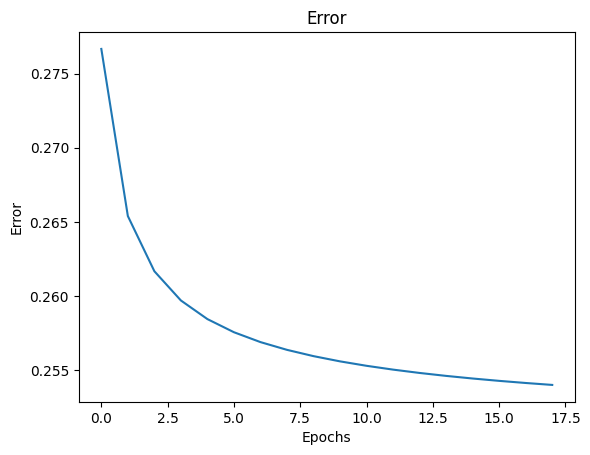

In [9]:
# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

Implement backpropagation for **AND problem** using similar input as used for XOR problem above and plot the error


Epoch: 9999, Average error: 0.02246
Epoch: 19999, Average error: 0.01430
Epoch: 29999, Average error: 0.01117
Epoch: 39999, Average error: 0.00943
Epoch: 49999, Average error: 0.00828
Epoch: 59999, Average error: 0.00746
Epoch: 69999, Average error: 0.00684
Epoch: 79999, Average error: 0.00634
Epoch: 89999, Average error: 0.00594
Epoch: 99999, Average error: 0.00560
Epoch: 109999, Average error: 0.00531
Epoch: 119999, Average error: 0.00506
Epoch: 129999, Average error: 0.00484
Epoch: 139999, Average error: 0.00465
Epoch: 149999, Average error: 0.00448
Epoch: 159999, Average error: 0.00432
Epoch: 169999, Average error: 0.00418
Epoch: 179999, Average error: 0.00405

Final output after training: [[2.02992584e-04 4.61979682e-03 4.58768937e-03 9.93199463e-01]]
Ground truth [0 0 0 1]
Error after training: [[-0.00020299 -0.00461981 -0.0045877   0.00680056]]
Average error: 0.00405


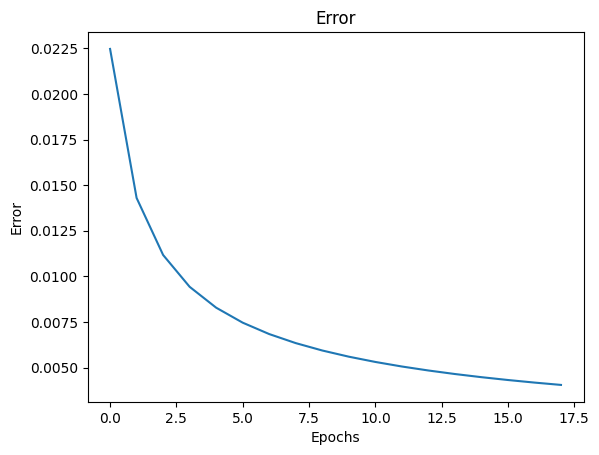

In [10]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 0, 0, 1])  # Expected output for AND

# Get initialized parameters
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()


decrease the learning rate to 0.01 and increase the number of epochs to 1000000 and check the error for XOR gate

Epoch: 9999, Average error: 0.11811
Epoch: 19999, Average error: 0.03735
Epoch: 29999, Average error: 0.02630
Epoch: 39999, Average error: 0.02132
Epoch: 49999, Average error: 0.01836
Epoch: 59999, Average error: 0.01634
Epoch: 69999, Average error: 0.01486
Epoch: 79999, Average error: 0.01371
Epoch: 89999, Average error: 0.01279
Epoch: 99999, Average error: 0.01202
Epoch: 109999, Average error: 0.01138
Epoch: 119999, Average error: 0.01083
Epoch: 129999, Average error: 0.01035
Epoch: 139999, Average error: 0.00993
Epoch: 149999, Average error: 0.00956
Epoch: 159999, Average error: 0.00922
Epoch: 169999, Average error: 0.00892
Epoch: 179999, Average error: 0.00864

Final output after training: [[0.00799062 0.99094442 0.99094425 0.00846258]]
Ground truth [0 1 1 0]
Error after training: [[-0.00799064  0.00905561  0.00905578 -0.0084626 ]]
Average error: 0.00864


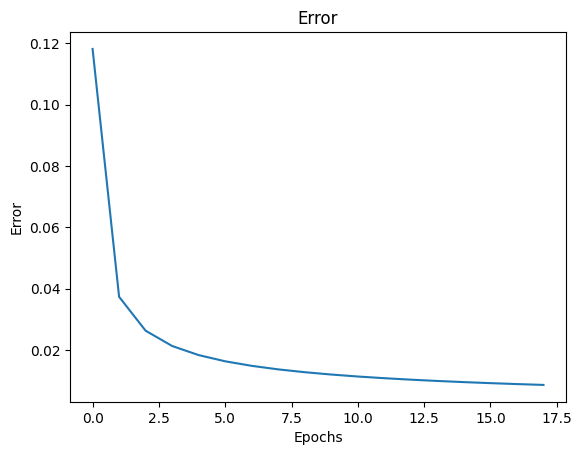

In [11]:
lr = 0.01         # Learning rate
epochs = 1000000   # Number of training epochs


# Defining inputs and expected output (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 1, 1, 0])  # Expected output for XOR

# Get initialized parameters
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))


# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()



## Explanation of Training

The training process in this notebook involves teaching a simple neural network to perform logical operations (XOR and AND) using the backpropagation algorithm. Here's a breakdown of what's happening:

**What is Training?**

In the context of neural networks, training is the process of adjusting the network's internal parameters (weights and biases) so that it can accurately map inputs to desired outputs. The goal is to minimize the difference between the network's predictions and the actual target values.

**Why Backpropagation?**

Backpropagation is the core algorithm used here to train the network. It's an efficient way to calculate the gradients of the error with respect to each weight and bias in the network. These gradients tell us how much each parameter contributes to the overall error and in which direction to adjust them to reduce that error.

The backpropagation process works in these steps:

1.  **Forward Pass**: The input data is fed through the network, layer by layer, to produce an output.
2.  **Error Calculation**: The difference between the network's output and the expected output (ground truth) is calculated. This is the error that the network needs to minimize.
3.  **Backward Pass**: The error is propagated backward through the network, starting from the output layer. Using calculus (specifically, the chain rule), the gradients of the error with respect to the weights and biases in each layer are computed.
4.  **Weight and Bias Update**: The weights and biases are updated using the calculated gradients and the learning rate. This update is done in a direction that reduces the error.

**Why are we using Epochs?**

An **epoch** represents one complete pass of the entire training dataset through the neural network, both forward and backward. Training a neural network is an iterative process. A single pass through the data is usually not enough for the network to learn the complex relationships between inputs and outputs. By running multiple epochs, the network gets repeated exposure to the data, allowing it to gradually adjust its weights and biases and improve its performance over time. The error typically decreases as the number of epochs increases, indicating that the network is learning.

**Why are we using Learning Rate?**

The **learning rate (lr)** is a hyperparameter that controls the step size during the weight and bias updates in the training process. It determines how much the weights and biases are adjusted in response to the calculated gradients.

*   **A high learning rate** means larger steps are taken during updates. This can lead to faster convergence (reaching the minimum error quickly) but might also cause the training to overshoot the minimum and oscillate, or even diverge.
*   **A low learning rate** means smaller steps are taken. This can lead to slower convergence but is less likely to overshoot and might find a more precise minimum.

Choosing an appropriate learning rate is crucial for effective training. If it's too high, the network might fail to converge. If it's too low, training might take a very long time. In this notebook, you experimented with different learning rates (0.1 and 0.01) to observe their impact on the training process and the final error.